In [12]:
import json
import pandas as pd
import sys
import matplotlib.pyplot as plt

sys.path.append('/home/yuliya/repos/cosybio/FedProt/evaluation_utils/')
from plots import upset_plot

In [13]:
def create_separate_df(mode = "balanced"):
    base_path = "/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/"
 
    central = pd.read_csv(base_path + mode + "/results/central_res.tsv", sep="\t", index_col=0).dropna()
    FedProt = pd.read_csv(base_path + mode + "/results/DPE.csv", sep="\t", index_col=0).dropna()

    Fisher = pd.read_csv(base_path + mode + "/results/MA_CM.tsv", sep="\t", index_col=1).dropna()
    Stouffer = pd.read_csv(base_path + mode + "/results/MA_Stouffer.tsv", sep="\t", index_col=0)
    RankProduct = pd.read_csv(base_path + mode + "/results/MA_RankProd.tsv", sep="\t", index_col=0).dropna()
    REM_res = pd.read_csv(base_path + mode + "/results/MA_REM.tsv", sep="\t", index_col=1).dropna()

    filter_list_META = {
        "Central" : pd.DataFrame(central.index.tolist(), columns=['proteins']),
        "FedProt" : pd.DataFrame(FedProt.index, columns=['proteins']),
        "Fisher" : pd.DataFrame(Fisher.index, columns=['proteins']),
        "Stouffer" : pd.DataFrame(Stouffer.index, columns=['proteins']),
        "RankProd" : pd.DataFrame(RankProduct.index, columns=['proteins']),
        "REM" : pd.DataFrame(REM_res.index, columns=['proteins'])
    }

    return filter_list_META


# Meta analyses

In [14]:
# Read the JSON file into a Python dictionary
with open('/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/analysed_proteins.json', 'r') as file:
    filter_list_META = json.load(file)

# transform list into pandas df column
for key in filter_list_META.keys():
    for center in filter_list_META[key].keys():
        # use proteins as a colname of a dataframe
        filter_list_META[key][center] = pd.DataFrame(filter_list_META[key][center], columns=['proteins'])

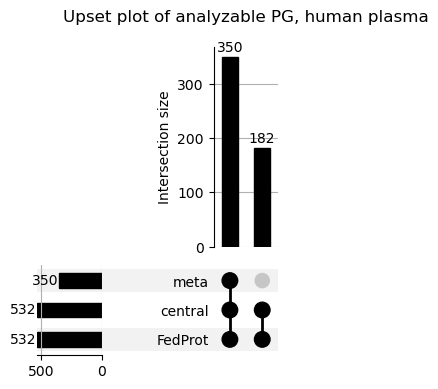

In [15]:
balanced_plot = upset_plot.generate_upset_plot(
    filter_list_META['01_smaller_lib_balanced_PG_MajorPG'],
    colname='proteins',
    title='Upset plot of analyzable PG, human plasma\n',
    categories=filter_list_META['01_smaller_lib_balanced_PG_MajorPG'].keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/upset_plot_balanced.svg',
)


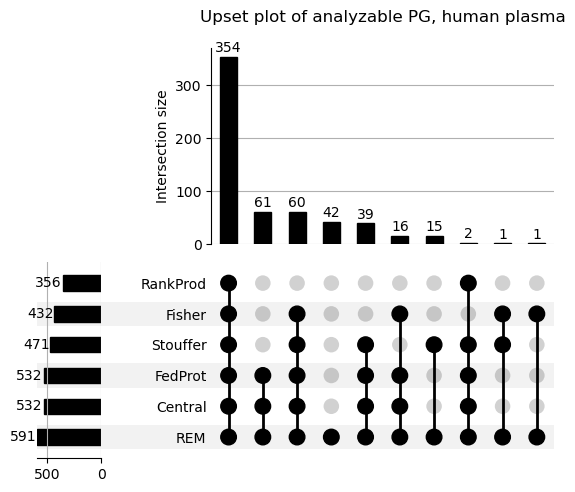

In [16]:
results = create_separate_df("01_smaller_lib_balanced_PG_MajorPG")

balanced_plot = upset_plot.generate_upset_plot(
    results,
    colname='proteins',
    title='Upset plot of analyzable PG, human plasma\n',
    categories=results.keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/upset_plot_balanced_v2.svg',
)


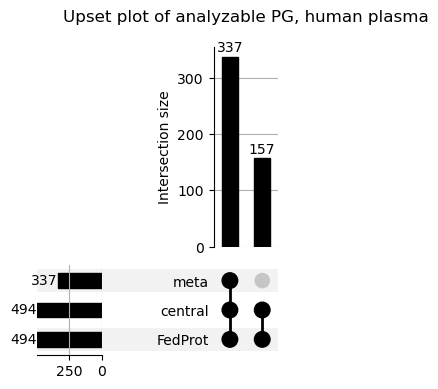

In [17]:
balanced_plot = upset_plot.generate_upset_plot(
    filter_list_META['01_smaller_lib_imbalanced_PG_MajorPG'],
    colname='proteins',
    title='Upset plot of analyzable PG, human plasma\n',
    categories=filter_list_META['01_smaller_lib_imbalanced_PG_MajorPG'].keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/TMT_imbalanced/upset_plot_imbalanced.svg',
)


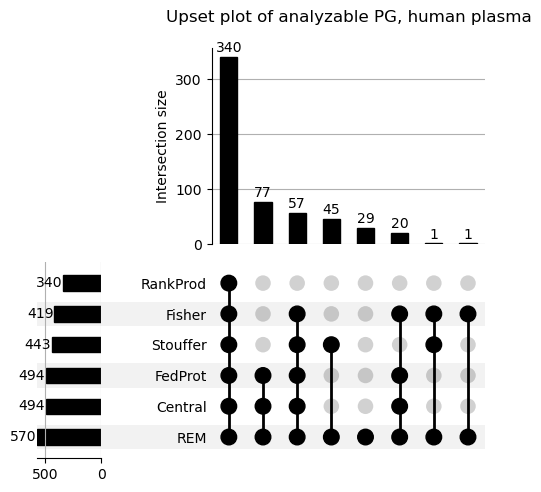

In [18]:
results = create_separate_df("01_smaller_lib_imbalanced_PG_MajorPG")

balanced_plot = upset_plot.generate_upset_plot(
    results,
    colname='proteins',
    title='Upset plot of analyzable PG, human plasma\n',
    categories=results.keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/TMT_imbalanced/upset_plot_imbalanced_v2.svg',
)


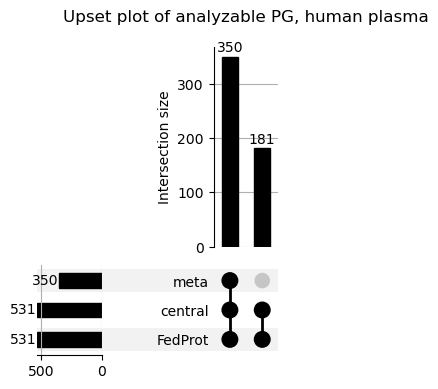

In [5]:
balanced_plot = upset_plot.generate_upset_plot(
    filter_list_META['01_smaller_lib_downsampled_PG_MajorPG'],
    colname='proteins',
    title='Upset plot of analyzable PG, human plasma\n',
    categories=filter_list_META['01_smaller_lib_downsampled_PG_MajorPG'].keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/TMT_imbalanced/upset_plot_downsampled.svg',
)
